<a href="https://colab.research.google.com/github/fairuznawar122/Solar-Radiation-Forecast/blob/main/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/fairuznawar122/Solar-Radiation-Forecast/refs/heads/main/merged_data.csv"

# Most robust solution
df = pd.read_csv(url,
                 quotechar='"',   # Explicitly declare quote character
                 escapechar='\\', # Handle escaped quotes
                 engine='python') # More tolerant parser

df

,YEAR,MO,DY,HR,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,ALLSKY_SFC_SW_DWN
0,2001,4,1,0,90.0,-3.98,-11.55,2.30,54.28,0.0,2.96,65.0,4.40,66.0,0.0
1,2001,4,1,1,90.0,-4.25,-11.20,2.37,57.18,0.0,3.08,61.0,4.67,61.7,0.0
2,2001,4,1,2,90.0,-4.46,-11.09,2.40,58.92,0.0,3.14,55.5,4.87,56.2,0.0
3,2001,4,1,3,90.0,-4.58,-11.08,2.40,59.52,0.0,3.17,49.0,4.97,49.6,0.0
4,2001,4,1,4,90.0,-4.63,-11.10,2.39,59.54,0.0,3.22,43.6,5.11,44.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204523,2024,7,30,19,90.0,11.21,2.75,7.16,55.88,0.0,4.47,25.1,7.41,25.3,0.0
204524,2024,7,30,20,90.0,9.70,3.14,7.36,63.56,0.0,5.06,32.4,7.67,32.9,0.0
204525,2024,7,30,21,90.0,8.32,3.39,7.49,71.00,0.0,4.76,35.0,7.44,35.2,0.0
204526,2024,7,30,22,90.0,7.20,3.31,7.45,76.21,0.0,4.34,36.1,7.19,36.5,0.0


In [3]:
# Count -999 values in entire DataFrame
missing_count = (df == -999).sum().sum()
print(f"Total -999 values found: {missing_count}")

# Count per column
print("\n-999 values per column:")
print((df == -999).sum())

Total -999 values found: 12

-999 values per column:
YEAR                 0
MO                   0
DY                   0
HR                   0
SZA                  6
T2M                  0
T2MDEW               0
QV2M                 0
RH2M                 0
PRECTOTCORR          0
WS10M                0
WD10M                0
WS50M                0
WD50M                0
ALLSKY_SFC_SW_DWN    6
dtype: int64


In [4]:
# Case 1: If column is named 'SZA' (exact match)
sza_missing = df[df['SZA'] == -999]

# Case 2: If column name might vary (e.g., 'sza', 'Solar_Zenith_Angle')
sza_col = [col for col in df.columns if 'sza' in col.lower()][0]  # Finds first matching column
sza_missing = df[df[sza_col] == -999]
print(f"Found {len(sza_missing)} rows with SZA = -999")
display(sza_missing.head())  # Show first few rows

Found 6 rows with SZA = -999


,YEAR,MO,DY,HR,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,ALLSKY_SFC_SW_DWN
199800,2024,1,16,0,-999.0,-13.45,-13.00,2.02,100.0,0.0,1.99,253.9,3.27,253.7,-999.0
199801,2024,1,16,1,-999.0,-13.76,-13.18,1.98,100.0,0.0,1.72,274.0,2.74,272.1,-999.0
199802,2024,1,16,2,-999.0,-14.13,-13.49,1.93,100.0,0.0,1.45,310.3,2.20,306.1,-999.0
199803,2024,1,16,3,-999.0,-14.82,-13.92,1.86,100.0,0.0,1.69,352.5,2.36,350.7,-999.0
199804,2024,1,16,4,-999.0,-15.88,-14.65,1.76,100.0,0.0,2.19,15.4,3.05,14.4,-999.0


In [5]:
#Deleting the entire 16th Feb, 2024 for some missing values
delete_condition = (
    (df['YEAR'] == 2024) &
    (df['MO'] == 1) &
    (df['DY'] == 16) &
    (df['HR'].between(0, 23))
)

In [6]:
# Get the indices of rows to be dropped
indices_to_drop = df[delete_condition].index

# Extract the rows BEFORE dropping them
dropped_rows = df.loc[indices_to_drop]  # This gives you the 96 rows being removed

# Verify
print(f"Rows being dropped: {len(dropped_rows)}")
display(dropped_rows.head())

# Now perform the actual drop
df = df.drop(indices_to_drop)
print(len(df))

Rows being dropped: 24


,YEAR,MO,DY,HR,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,ALLSKY_SFC_SW_DWN
199800,2024,1,16,0,-999.0,-13.45,-13.00,2.02,100.0,0.0,1.99,253.9,3.27,253.7,-999.0
199801,2024,1,16,1,-999.0,-13.76,-13.18,1.98,100.0,0.0,1.72,274.0,2.74,272.1,-999.0
199802,2024,1,16,2,-999.0,-14.13,-13.49,1.93,100.0,0.0,1.45,310.3,2.20,306.1,-999.0
199803,2024,1,16,3,-999.0,-14.82,-13.92,1.86,100.0,0.0,1.69,352.5,2.36,350.7,-999.0
199804,2024,1,16,4,-999.0,-15.88,-14.65,1.76,100.0,0.0,2.19,15.4,3.05,14.4,-999.0


204504


In [7]:
df= df.rename(columns={'ALLSKY_SFC_SW_DWN': 'GHI'})
df

,YEAR,MO,DY,HR,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,GHI
0,2001,4,1,0,90.0,-3.98,-11.55,2.30,54.28,0.0,2.96,65.0,4.40,66.0,0.0
1,2001,4,1,1,90.0,-4.25,-11.20,2.37,57.18,0.0,3.08,61.0,4.67,61.7,0.0
2,2001,4,1,2,90.0,-4.46,-11.09,2.40,58.92,0.0,3.14,55.5,4.87,56.2,0.0
3,2001,4,1,3,90.0,-4.58,-11.08,2.40,59.52,0.0,3.17,49.0,4.97,49.6,0.0
4,2001,4,1,4,90.0,-4.63,-11.10,2.39,59.54,0.0,3.22,43.6,5.11,44.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204523,2024,7,30,19,90.0,11.21,2.75,7.16,55.88,0.0,4.47,25.1,7.41,25.3,0.0
204524,2024,7,30,20,90.0,9.70,3.14,7.36,63.56,0.0,5.06,32.4,7.67,32.9,0.0
204525,2024,7,30,21,90.0,8.32,3.39,7.49,71.00,0.0,4.76,35.0,7.44,35.2,0.0
204526,2024,7,30,22,90.0,7.20,3.31,7.45,76.21,0.0,4.34,36.1,7.19,36.5,0.0


In [8]:
import pandas as pd
dayoftheyear= pd.DataFrame()
# Assuming df has 'month' and 'day' columns
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' +
                           df['MO'].astype(str) + '-' +
                           df['DY'].astype(str))
df['date'] = pd.to_datetime(df['date'])

# 2) add hours as a timedelta
df['datetime'] = df['date'] + pd.to_timedelta(df['HR'], unit='h')

In [9]:
df.drop(columns=['YEAR','MO','DY','HR'], inplace=True)

In [10]:
df

,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,GHI,date,datetime
0,90.0,-3.98,-11.55,2.30,54.28,0.0,2.96,65.0,4.40,66.0,0.0,2001-04-01,2001-04-01 00:00:00
1,90.0,-4.25,-11.20,2.37,57.18,0.0,3.08,61.0,4.67,61.7,0.0,2001-04-01,2001-04-01 01:00:00
2,90.0,-4.46,-11.09,2.40,58.92,0.0,3.14,55.5,4.87,56.2,0.0,2001-04-01,2001-04-01 02:00:00
3,90.0,-4.58,-11.08,2.40,59.52,0.0,3.17,49.0,4.97,49.6,0.0,2001-04-01,2001-04-01 03:00:00
4,90.0,-4.63,-11.10,2.39,59.54,0.0,3.22,43.6,5.11,44.3,0.0,2001-04-01,2001-04-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204523,90.0,11.21,2.75,7.16,55.88,0.0,4.47,25.1,7.41,25.3,0.0,2024-07-30,2024-07-30 19:00:00
204524,90.0,9.70,3.14,7.36,63.56,0.0,5.06,32.4,7.67,32.9,0.0,2024-07-30,2024-07-30 20:00:00
204525,90.0,8.32,3.39,7.49,71.00,0.0,4.76,35.0,7.44,35.2,0.0,2024-07-30,2024-07-30 21:00:00
204526,90.0,7.20,3.31,7.45,76.21,0.0,4.34,36.1,7.19,36.5,0.0,2024-07-30,2024-07-30 22:00:00


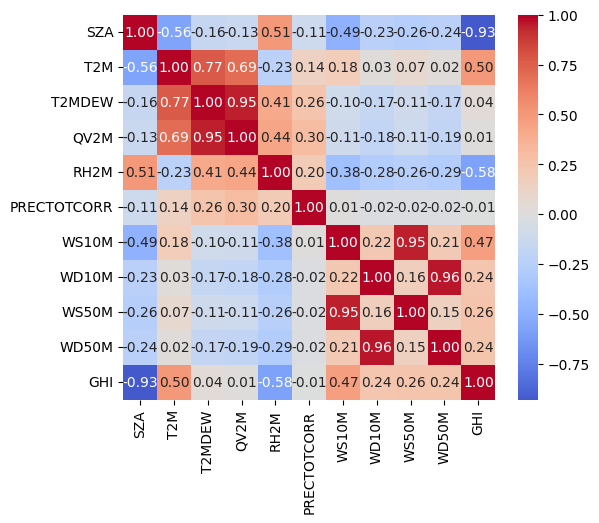

In [12]:
corr = df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.show()


In [105]:
df

,SZA,T2M,T2MDEW,QV2M,RH2M,PRECTOTCORR,WS10M,WD10M,WS50M,WD50M,GHI,date,datetime
0,90.0,-3.98,-11.55,2.30,54.28,0.0,2.96,65.0,4.40,66.0,0.0,2001-04-01,2001-04-01 00:00:00
1,90.0,-4.25,-11.20,2.37,57.18,0.0,3.08,61.0,4.67,61.7,0.0,2001-04-01,2001-04-01 01:00:00
2,90.0,-4.46,-11.09,2.40,58.92,0.0,3.14,55.5,4.87,56.2,0.0,2001-04-01,2001-04-01 02:00:00
3,90.0,-4.58,-11.08,2.40,59.52,0.0,3.17,49.0,4.97,49.6,0.0,2001-04-01,2001-04-01 03:00:00
4,90.0,-4.63,-11.10,2.39,59.54,0.0,3.22,43.6,5.11,44.3,0.0,2001-04-01,2001-04-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204523,90.0,11.21,2.75,7.16,55.88,0.0,4.47,25.1,7.41,25.3,0.0,2024-07-30,2024-07-30 19:00:00
204524,90.0,9.70,3.14,7.36,63.56,0.0,5.06,32.4,7.67,32.9,0.0,2024-07-30,2024-07-30 20:00:00
204525,90.0,8.32,3.39,7.49,71.00,0.0,4.76,35.0,7.44,35.2,0.0,2024-07-30,2024-07-30 21:00:00
204526,90.0,7.20,3.31,7.45,76.21,0.0,4.34,36.1,7.19,36.5,0.0,2024-07-30,2024-07-30 22:00:00


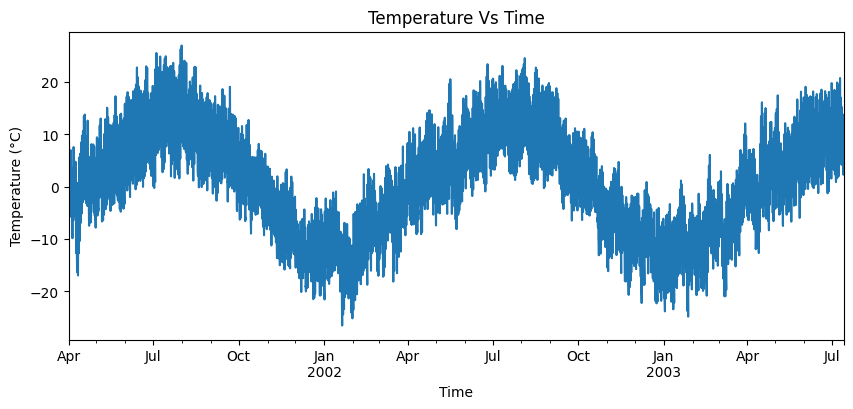

In [77]:
df.head(20000)['T2M'].plot(figsize=(10,4), title='Temperature Vs Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.show()


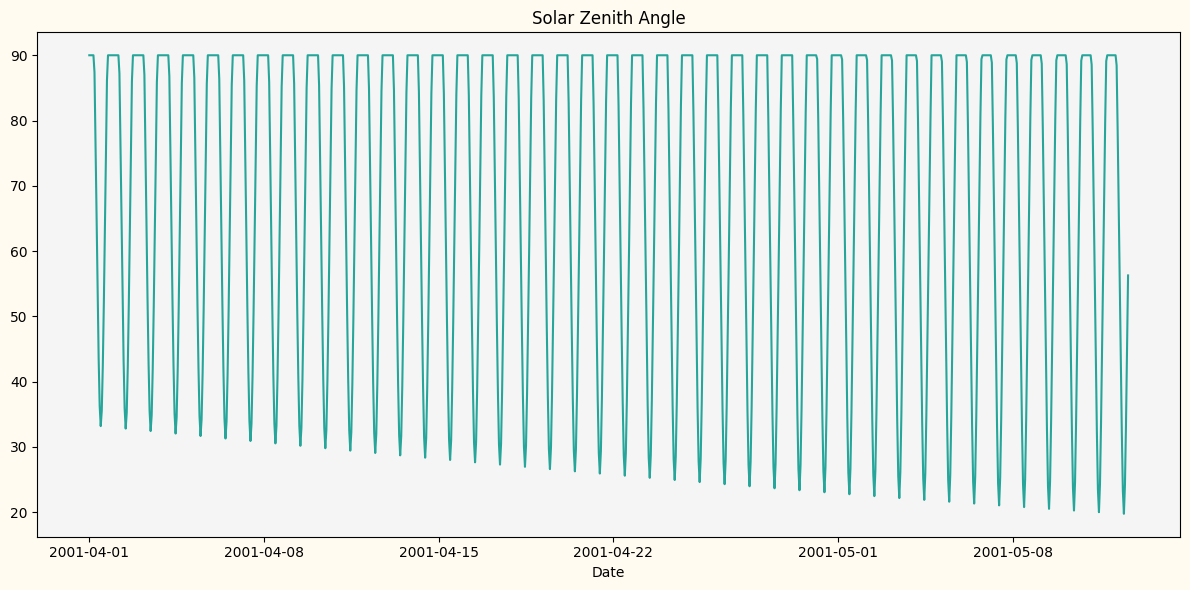

In [11]:
import matplotlib.pyplot as plt

# Grab just the first 100 rows (assuming datetime‐indexed df)
df_slice = df.head(1000)
df_slice = df_slice.set_index('datetime', drop=True)
# 1) Create figure & axes, set their backgrounds
fig, ax = plt.subplots(
    figsize=(12,6),
    facecolor='#fffbf0'            # background of the entire figure
)
ax.set_facecolor('whitesmoke')       # background of the plotting area

# 2) Plot your line + markers with custom colors
ax.plot(
    df_slice.index,
    df_slice['SZA'],
    color='#26a69a',                     # line color
    markerfacecolor='blue',          # fill color of markers
    markeredgecolor='navy',          # edge color of markers
    linestyle='-'
)

# 3) Labels & title
ax.set_xlabel('Date')
# ax.set_ylabel('Temperature (°C)')
ax.set_title('Solar Zenith Angle')

# 4) Tidy up
plt.tight_layout()
plt.show()


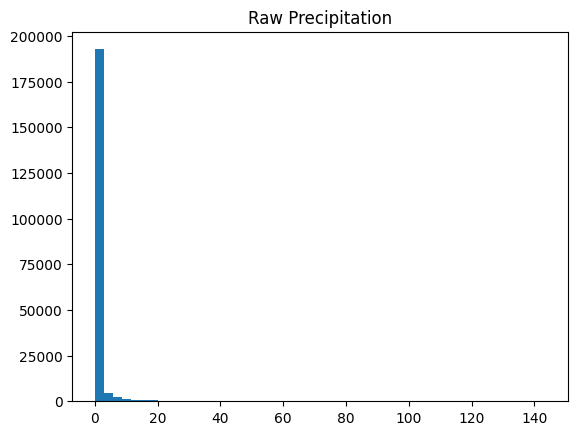

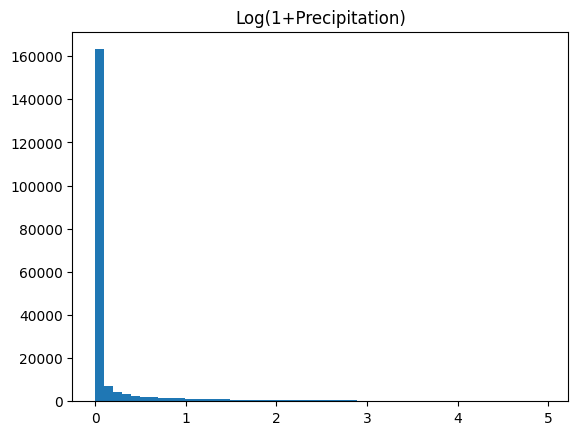

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# raw precip
vals = df['PRECTOTCORR']
plt.hist(vals, bins=50)
plt.title('Raw Precipitation'); plt.show()

# log1p-scaled precip
vals_log = np.log1p(vals)
plt.hist(vals_log, bins=50)
plt.title('Log(1+Precipitation)'); plt.show()
